In [1]:
import pandas as pd

# Run time

In [2]:
runtime = pd.read_excel(
    'comp_runtime.xlsx', header=0, index_col=0
)
runtime

,n_channels,duration,HerdingSpikes2,IronClust,JRClust,MountainSort4,Tridesclous,SpikingCircus,KiloSort2
recording,,,,,,,,,
rec_16c_1200s_11,16,1200,97.00,46.39,213.55,296.85,173.68,419.16,90.99
rec_16c_1200s_21,16,1200,103.87,49.53,258.47,201.66,216.92,683.05,93.54
rec_16c_1200s_31,16,1200,100.12,49.37,391.72,298.47,198.66,542.18,100.24
rec_16c_600s_11,16,600,48.76,28.11,176.02,144.02,211.29,102.96,58.50
rec_16c_600s_12,16,600,49.96,28.54,261.76,136.86,239.55,97.81,58.36
rec_16c_600s_21,16,600,53.16,29.71,62.01,144.91,339.09,129.19,58.87
rec_16c_600s_22,16,600,51.38,30.70,76.69,139.81,335.57,149.54,57.69
rec_16c_600s_31,16,600,52.82,30.16,386.04,137.65,117.21,344.74,63.67
rec_16c_600s_32,16,600,52.38,29.52,58.12,136.01,118.17,305.37,62.50


In [3]:
data = {
    'Num. Chan.': [],
    'Duration (s)': [],
    'Algorithms': [],
    'Run time (s)': [],
}

algorithms = list(runtime.columns[2:])

for i in range(len(runtime)):
    results = runtime.iloc[i, :][algorithms].to_list()
    data['Num. Chan.'] += [runtime.iloc[i, 0]] * len(results)
    data['Duration (s)'] += [runtime.iloc[i, 1]] * len(results)
    data['Algorithms'] += algorithms
    data['Run time (s)'] += results

df = pd.DataFrame(data=data)
df
        

,Num. Chan.,Duration (s),Algorithms,Run time (s)
0,16,1200,HerdingSpikes2,97.00
1,16,1200,IronClust,46.39
2,16,1200,JRClust,213.55
3,16,1200,MountainSort4,296.85
4,16,1200,Tridesclous,173.68
...,...,...,...,...
142,64,600,JRClust,93.49
143,64,600,MountainSort4,483.21
144,64,600,Tridesclous,373.69
145,64,600,SpikingCircus,1009.73


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

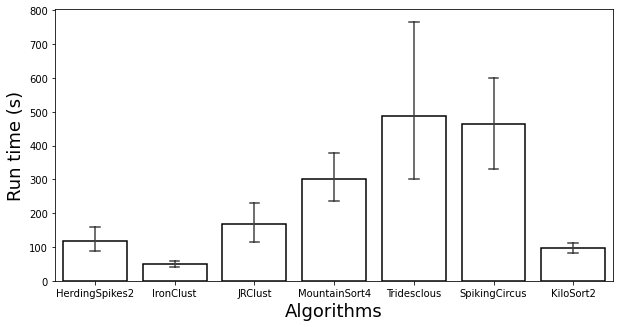

In [7]:
_, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    df, x='Algorithms', y='Run time (s)', 
    err_kws={'lw': 1.5}, 
    capsize=0.12,
    edgecolor='k',
    facecolor='w', 
    lw=1.5,
    ax=ax
)
ax.set_xlabel(r'Algorithms', fontsize=18)
ax.set_ylabel('Run time (s)', fontsize=18)

plt.savefig('figures/runtime.png', transparent=True, dpi=300)
plt.show()

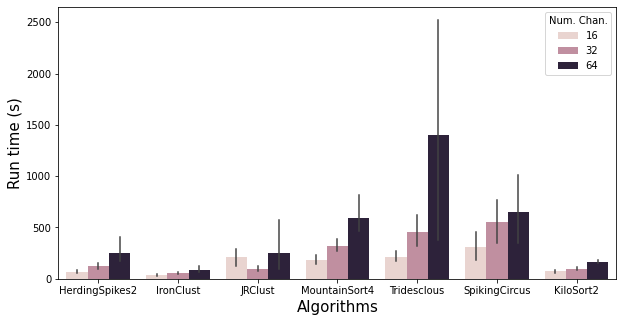

In [44]:
_, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    df, x='Algorithms', y='Run time (s)', hue='Num. Chan.', 
    err_kws={'lw': 1.5}, 
    ax=ax
)
ax.set_xlabel('Algorithms', fontsize=15)
ax.set_ylabel('Run time (s)', fontsize=15)
plt.show()

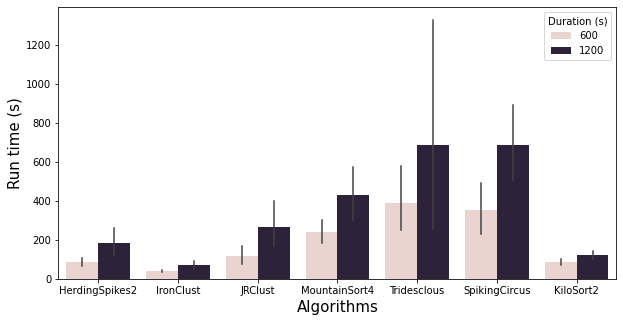

In [46]:
_, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    df, x='Algorithms', y='Run time (s)', hue='Duration (s)', 
    err_kws={'lw': 1.5}, 
    ax=ax
)
ax.set_xlabel('Algorithms', fontsize=15)
ax.set_ylabel('Run time (s)', fontsize=15)
plt.show()

# Accuracy

In [8]:
import pandas as pd

In [9]:
accuracy = pd.read_excel(
    'comp_accuracy.xlsx', header=0
)
accuracy

,SNR,recording,HerdingSpikes2,IronClust,JRClust,KiloSort,KiloSort2,Klusta,MountainSort4,SpykingCircus,Tridesclous,Waveclus
0,0,rec_16c_1200s_11,0.19,0.22,0.22,0.25,0.25,,0.24,0.24,0.21,NaN
1,0,rec_16c_1200s_21,0.24,0.27,0.30,0.30,0.30,,0.29,0.30,0.28,NaN
2,0,rec_16c_1200s_31,0.29,0.35,0.32,0.36,0.37,,0.32,0.35,0.32,NaN
3,0,rec_16c_600s_11,0.18,0.21,0.21,0.25,0.23,,0.24,0.24,0.23,NaN
4,0,rec_16c_600s_12,0.19,0.22,0.21,0.24,0.23,,0.24,0.25,0.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
415,19,rec_32c_600s_31,0.96,0.99,0.98,0.91,1.00,,0.83,0.97,0.99,
416,19,rec_32c_600s_32,0.97,0.99,0.98,0.89,0.96,,0.79,1.00,0.99,
417,19,rec_64c_1200s_11,0.96,0.99,0.98,0.93,0.88,,0.86,0.99,0.97,
418,19,rec_64c_600s_11,0.93,0.99,0.99,0.91,0.87,,0.83,0.99,0.99,


In [10]:
data = {
    'Num. Chan.': [],
    'Duration (s)': [],
    'Algorithms': [],
    'Accuracy': [],
    'SNR': []
}

algorithms = list(accuracy.columns[2:])
# Let's remove Klusta and Waveclus
algorithms = [
    algo for algo in algorithms
    if ('Klusta' not in algo) and ('Waveclus' not in algo) 
]

for i in range(len(accuracy)):
    
    # Accuracy results
    results = accuracy.iloc[i, :][algorithms].to_list()
    # Get number of channels and recording duration
    name = accuracy.iloc[i, 1]
    if '16' in name:
        data['Num. Chan.'] += [16] * len(results)
    elif '32' in name:
        data['Num. Chan.'] += [32] * len(results)
    else:
        data['Num. Chan.'] += [64] * len(results)
    if '600' in name:
        data['Duration (s)'] += [600] * len(results)
    else:
        data['Duration (s)'] += [1200] * len(results)
    
    data['Algorithms'] += algorithms
    data['Accuracy'] += results
    data['SNR'] += [accuracy.iloc[i, 0]] * len(results)

df = pd.DataFrame(data=data)
df

,Num. Chan.,Duration (s),Algorithms,Accuracy,SNR
0,16,1200,HerdingSpikes2,0.19,0
1,16,1200,IronClust,0.22,0
2,16,1200,JRClust,0.22,0
3,16,1200,KiloSort,0.25,0
4,16,1200,KiloSort2,0.25,0
...,...,...,...,...,...
3355,64,600,KiloSort,0.94,19
3356,64,600,KiloSort2,0.88,19
3357,64,600,MountainSort4,0.83,19
3358,64,600,SpykingCircus,0.99,19


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

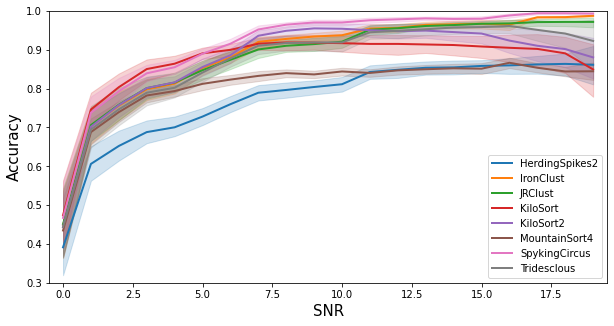

In [22]:
_, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(
    df, x='SNR', y='Accuracy', 
    hue='Algorithms',
    lw=2,
    ax=ax
)
ax.set_xlabel('SNR', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xlim((-0.5, 19.5))
ax.set_ylim((0.3, 1))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend()

plt.savefig('figures/snr_vs_accuracy.png', transparent=True, dpi=300)
plt.show()

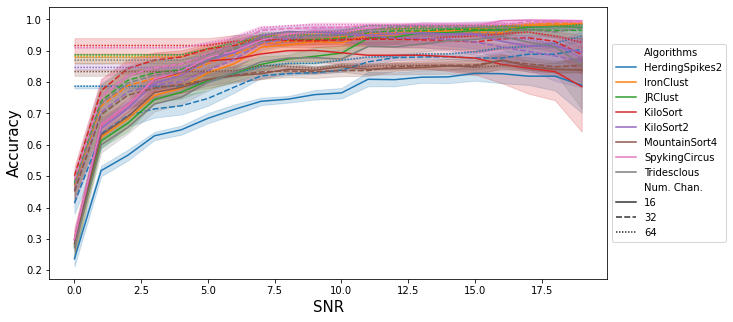

In [16]:
_, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(
    df, x='SNR', y='Accuracy', 
    hue='Algorithms', style='Num. Chan.', 
    ax=ax
)
ax.set_xlabel('SNR', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

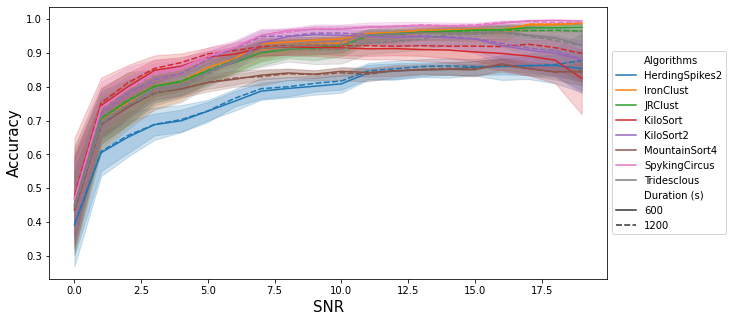

In [17]:
_, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(
    df, x='SNR', y='Accuracy', 
    hue='Algorithms', style='Duration (s)', 
    ax=ax
)
ax.set_xlabel('SNR', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()